In [138]:
import pandas as pd
%matplotlib inline
# Load dataset
df = pd.read_csv('Undergraduate Admission Test Survey in Bangladesh.csv')
print("Dataset loaded successfully.")
df.head()

Dataset loaded successfully.


,SSC_GPA,HSC_GPA,Family_Economy,Residence,Family_Education,Politics,Social_Media_Engagement,Residence_with_Family,Duration_of_Study,College_Location,School_Location,Bad_Habits,Relationship,External_Factors,University
0,5.0,4.67,2,1,1,1,4,0,4,1,0,0,0,1,0
1,5.0,5.00,3,1,1,0,5,0,6,1,0,0,1,1,1
2,5.0,4.44,2,0,1,0,1,1,2,0,0,0,0,0,0
3,5.0,5.00,2,1,1,0,1,1,2,1,1,0,0,0,1
4,5.0,5.00,2,1,1,0,1,0,2,1,1,0,0,0,1


### checking for duplicates and dropping them

In [139]:
# Remove duplicates
print(f"Original shape: {df.shape}")
df = df.drop_duplicates()
print(f"Shape after removing 95 duplicates: {df.shape}")

Original shape: (600, 15)
Shape after removing 95 duplicates: (505, 15)


### Checking for missing rows and imputing them

In [140]:
print(df.isnull().sum())

SSC_GPA                    0
HSC_GPA                    3
Family_Economy             0
Residence                  0
Family_Education           0
Politics                   0
Social_Media_Engagement    0
Residence_with_Family      0
Duration_of_Study          0
College_Location           0
School_Location            0
Bad_Habits                 0
Relationship               0
External_Factors           0
University                 0
dtype: int64


Since `HSC_GPA` is a numerical column imputing them with **Median**

In [141]:
# Handle missing values
df['HSC_GPA'] = df['HSC_GPA'].fillna(df['HSC_GPA'].median())
print(df.isnull().sum())  # Verify no missing values
print(df['HSC_GPA'].describe())  # Check distribution

print(f"Final shape: {df.shape}")

SSC_GPA                    0
HSC_GPA                    0
Family_Economy             0
Residence                  0
Family_Education           0
Politics                   0
Social_Media_Engagement    0
Residence_with_Family      0
Duration_of_Study          0
College_Location           0
School_Location            0
Bad_Habits                 0
Relationship               0
External_Factors           0
University                 0
dtype: int64
count    505.000000
mean       4.764218
std        0.404124
min        3.170000
25%        4.670000
50%        5.000000
75%        5.000000
max        5.000000
Name: HSC_GPA, dtype: float64
Final shape: (505, 15)


In [142]:
df['University'].value_counts()

University
1    256
0    249
Name: count, dtype: int64

Dataset shows a nearly balanced class distribution for University:
- Public Universities (1): 256 samples (~50.7%).
- Private Universities (0): 249 samples (~49.3%).

### Testing a Baseline Model (Random Forest)

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Prepare features and target
X = df.drop('University', axis=1)
y = df['University']

# Check data types to ensure all features are numeric
print(X.dtypes)

# Baseline Random Forest
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print(f"RF F1-Score: {scores.mean():.3f} ± {scores.std():.3f}")

# Additional metrics
scores_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

SSC_GPA                    float64
HSC_GPA                    float64
Family_Economy               int64
Residence                    int64
Family_Education             int64
Politics                     int64
Social_Media_Engagement      int64
Residence_with_Family        int64
Duration_of_Study            int64
College_Location             int64
School_Location              int64
Bad_Habits                   int64
Relationship                 int64
External_Factors             int64
dtype: object
RF F1-Score: 0.653 ± 0.148
Precision: 0.757 ± 0.165
Recall: 0.670 ± 0.240


In [144]:
# Check for outliers
print("SSC_GPA distribution:")
print(df['SSC_GPA'].describe())
print("\nHSC_GPA distribution:")
print(df['HSC_GPA'].describe())

SSC_GPA distribution:
count    505.000000
mean       4.835089
std        0.342338
min        2.990000
25%        4.830000
50%        5.000000
75%        5.000000
max        5.000000
Name: SSC_GPA, dtype: float64

HSC_GPA distribution:
count    505.000000
mean       4.764218
std        0.404124
min        3.170000
25%        4.670000
50%        5.000000
75%        5.000000
max        5.000000
Name: HSC_GPA, dtype: float64


In [145]:
# Define threshold (e.g., GPA < 3.0 as outlier, adjust based on context)
threshold = 3.0
outliers_ssc = df[df['SSC_GPA'] < threshold]
outliers_hsc = df[df['HSC_GPA'] < threshold]
print(f"SSC_GPA outliers (<{threshold}): {len(outliers_ssc)}")
print(f"HSC_GPA outliers (<{threshold}): {len(outliers_hsc)}")

SSC_GPA outliers (<3.0): 1
HSC_GPA outliers (<3.0): 0


In [146]:
# Option 2: Winsorize (cap low GPAs)
df['SSC_GPA'] = df['SSC_GPA'].clip(lower=threshold)
df['HSC_GPA'] = df['HSC_GPA'].clip(lower=threshold)
print(f"Shape after winsorization: {df.shape}")
print(df[['SSC_GPA', 'HSC_GPA']].describe())

Shape after winsorization: (505, 15)
          SSC_GPA     HSC_GPA
count  505.000000  505.000000
mean     4.835109    4.764218
std      0.342231    0.404124
min      3.000000    3.170000
25%      4.830000    4.670000
50%      5.000000    5.000000
75%      5.000000    5.000000
max      5.000000    5.000000


In [147]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Prepare features and target
X = df.drop('University', axis=1)
y = df['University']

# Baseline Random Forest
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print(f"RF F1-Score: {scores.mean():.3f} ± {scores.std():.3f}")

# Additional metrics
scores_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

RF F1-Score: 0.653 ± 0.148
Precision: 0.757 ± 0.165
Recall: 0.670 ± 0.240


One SSC_GPA outlier (GPA < 3.0) winsorized to 3.0. The Random Forest F1-score (0.653 ± 0.148) is unchanged from before, indicating that the single outlier wasn’t the primary issue behind the low performance.

In [148]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df.drop('University', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

                    Feature         VIF
0                   SSC_GPA  182.562174
1                   HSC_GPA  159.827480
2            Family_Economy   11.790901
3                 Residence    7.043121
4          Family_Education    8.366852
5                  Politics    1.183268
6   Social_Media_Engagement    6.560833
7     Residence_with_Family    2.991683
8         Duration_of_Study    9.278404
9          College_Location   12.201534
10          School_Location    4.090793
11               Bad_Habits    1.211516
12             Relationship    1.440447
13         External_Factors    2.077969


The VIF (Variance Inflation Factor) values indicate the degree of multicollinearity among the features in the dataset.

    High VIF Values:
        SSC_GPA (182.56) and HSC_GPA (159.83) have extremely high VIFs, suggesting severe multicollinearity. These features are likely highly correlated with each other or with other variables, which could destabilize your model.
        Features like College_Location (12.20) and Family_Economy (11.79) also have elevated VIFs (>10), indicating moderate to high multicollinearity.
    Moderate VIF Values:
        Duration_of_Study (9.28), Family_Education (8.37), Residence (7.04), and Social_Media_Engagement (6.56) have VIFs between 5 and 10, suggesting some multicollinearity that may warrant investigation but is less severe.
    Low VIF Values:
        Features like School_Location (4.09), Residence_with_Family (2.99), External_Factors (2.08), Relationship (1.44), Politics (1.18), and Bad_Habits (1.21) have VIFs below 5, indicating low or negligible multicollinearity.

## EDA

In [149]:
!pip install statsmodels

In [150]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency
import numpy as np
from sklearn.ensemble import RandomForestClassifier

# Set plot style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

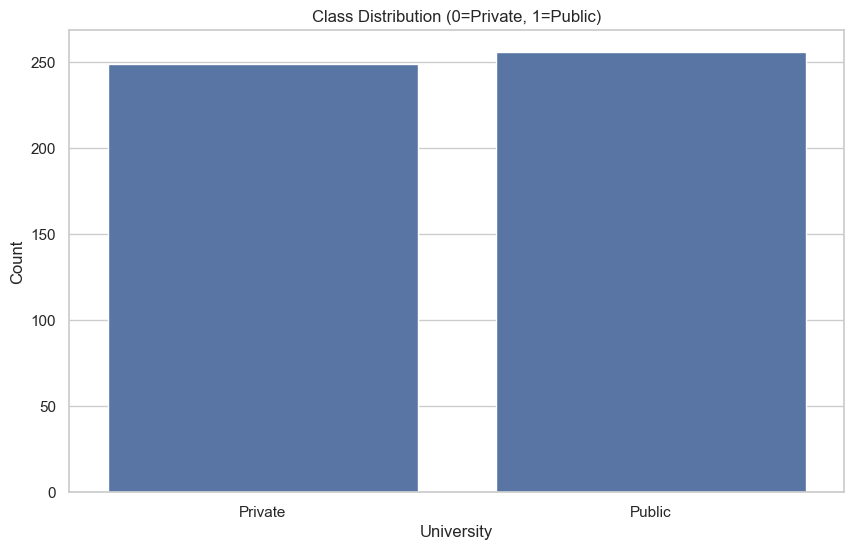

Class Distribution:
University
1    0.506931
0    0.493069
Name: proportion, dtype: float64


In [151]:
# 1. Class Distribution
plt.figure()
sns.countplot(x='University', data=df)
plt.title('Class Distribution (0=Private, 1=Public)')
plt.xlabel('University')
plt.ylabel('Count')
plt.xticks([0, 1], ['Private', 'Public'])
plt.show()
print("Class Distribution:")
print(df['University'].value_counts(normalize=True))

In [152]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Select numerical features
numerical_features = ['SSC_GPA', 'HSC_GPA']
X_num = df[numerical_features]

# Scale features
scaler = StandardScaler()
X_num_scaled = scaler.fit_transform(X_num)

# Apply PCA
pca = PCA(n_components=1)  # Reduce to 1 component
X_pca = pca.fit_transform(X_num_scaled)
df['PCA_GPA'] = X_pca

# Drop original features
df = df.drop(numerical_features, axis=1)
print(f"Explained variance ratio: {pca.explained_variance_ratio_}")

In [155]:
# Check column names to confirm
print("Columns in DataFrame:")
print(df.columns)

Columns in DataFrame:
Index(['Family_Economy', 'Residence', 'Family_Education', 'Politics',
       'Social_Media_Engagement', 'Residence_with_Family', 'Duration_of_Study',
       'College_Location', 'School_Location', 'Bad_Habits', 'Relationship',
       'External_Factors', 'University', 'Weighted_GPA'],
      dtype='object')


In [136]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Prepare features and target
X = df.drop('University', axis=1)
y = df['University']

# Baseline Random Forest
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X, y, cv=5, scoring='f1')
print(f"RF F1-Score: {scores.mean():.3f} ± {scores.std():.3f}")

# Additional metrics
scores_precision = cross_val_score(rf, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(rf, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

RF F1-Score: 0.676 ± 0.118
Precision: 0.796 ± 0.169
Recall: 0.650 ± 0.191


In [98]:
# 2. Feature Distributions

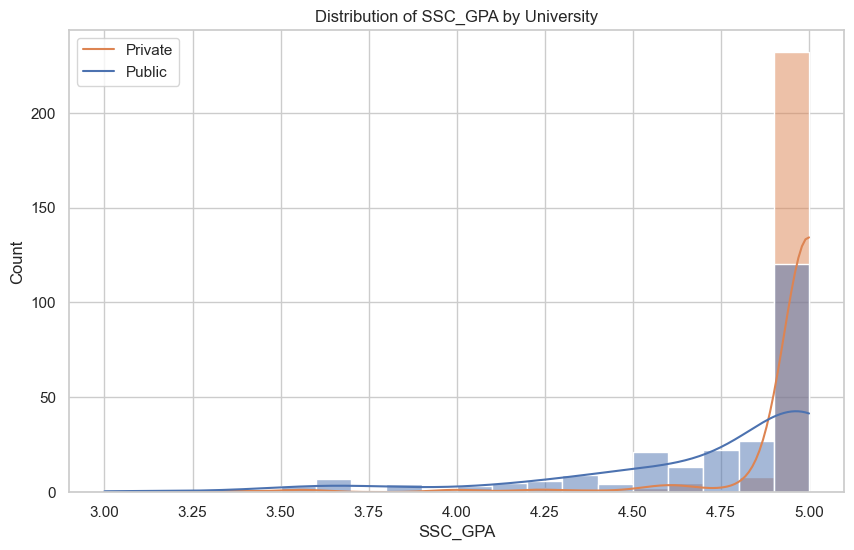


SSC_GPA Summary:
            count      mean       std   min   25%   50%  75%  max
University                                                       
0           249.0  4.718112  0.407133  3.00  4.56  4.89  5.0  5.0
1           256.0  4.948906  0.209559  3.36  5.00  5.00  5.0  5.0


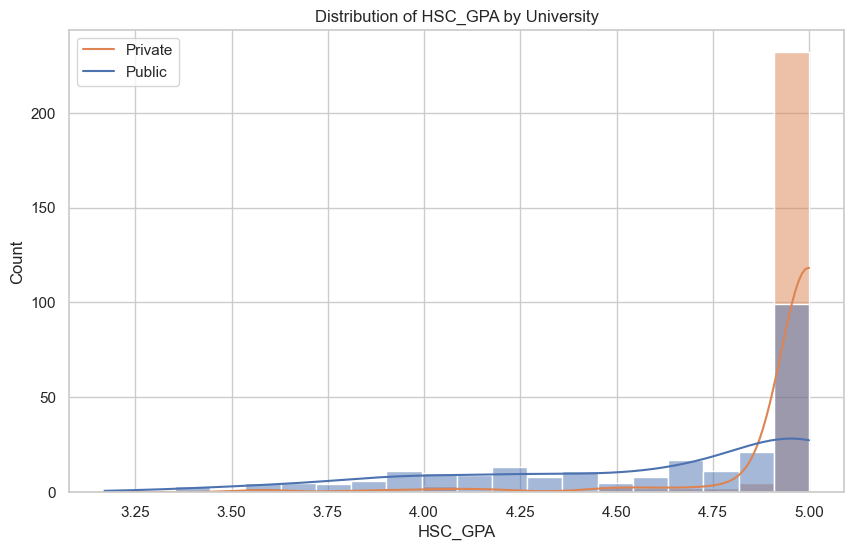


HSC_GPA Summary:
            count      mean       std   min   25%   50%  75%  max
University                                                       
0           249.0  4.582651  0.468688  3.17  4.25  4.75  5.0  5.0
1           256.0  4.940820  0.213658  3.58  5.00  5.00  5.0  5.0


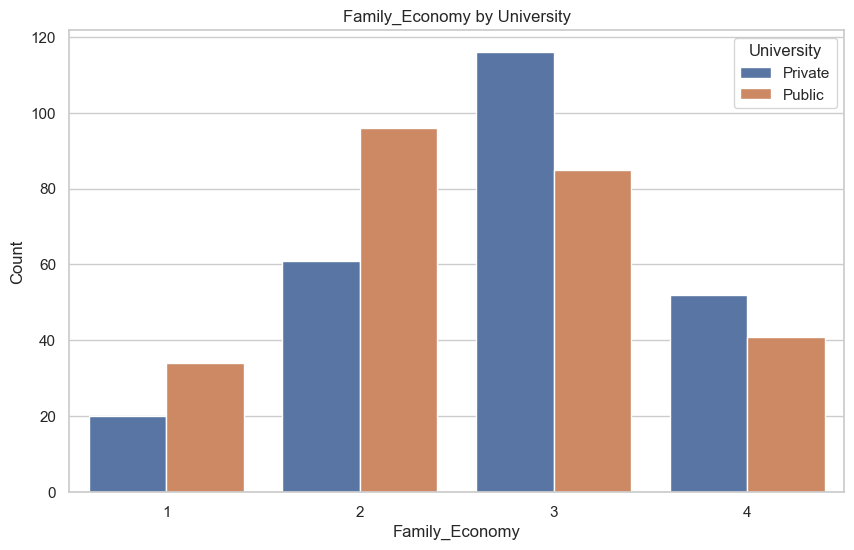


Family_Economy Cross-Tabulation (Proportions):
University             0         1
Family_Economy                    
1               0.370370  0.629630
2               0.388535  0.611465
3               0.577114  0.422886
4               0.559140  0.440860


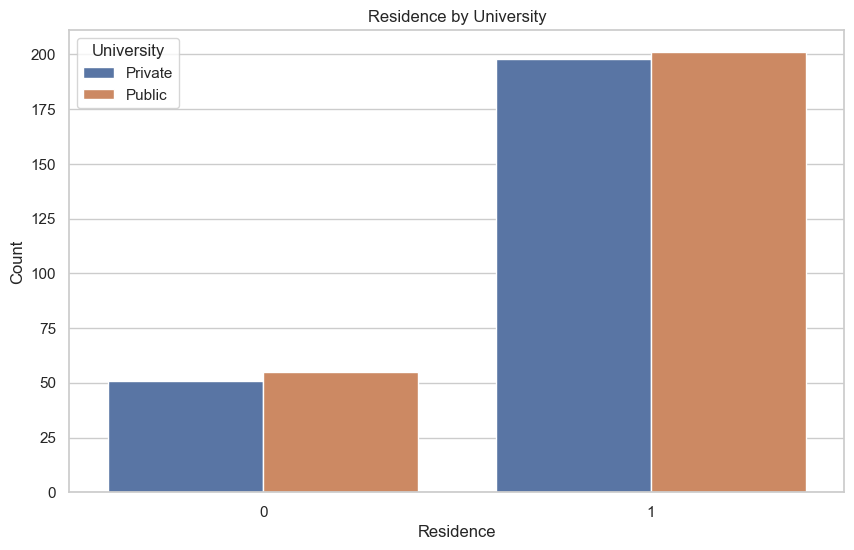


Residence Cross-Tabulation (Proportions):
University         0         1
Residence                     
0           0.481132  0.518868
1           0.496241  0.503759


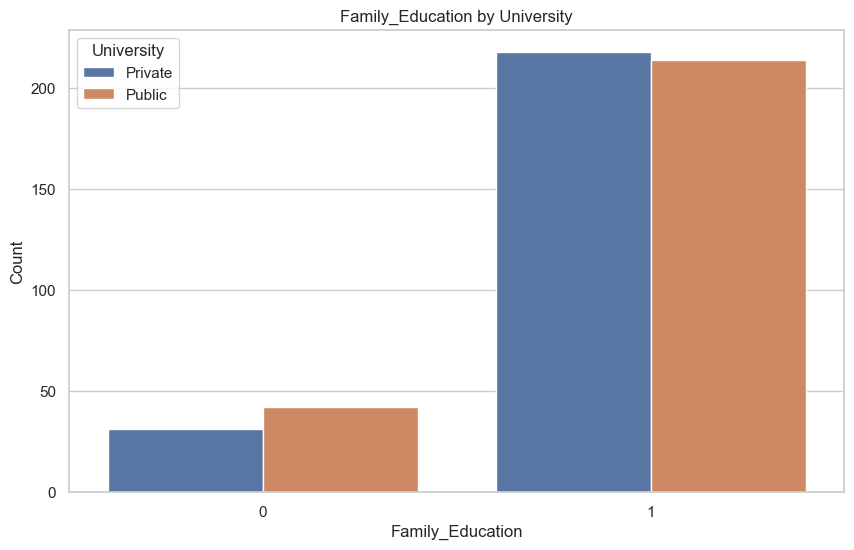


Family_Education Cross-Tabulation (Proportions):
University               0         1
Family_Education                    
0                 0.424658  0.575342
1                 0.504630  0.495370


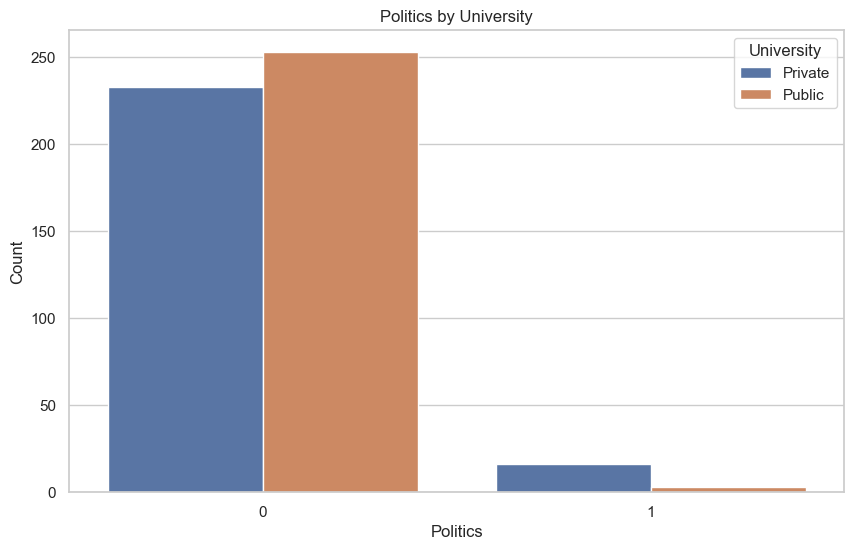


Politics Cross-Tabulation (Proportions):
University         0         1
Politics                      
0           0.479424  0.520576
1           0.842105  0.157895


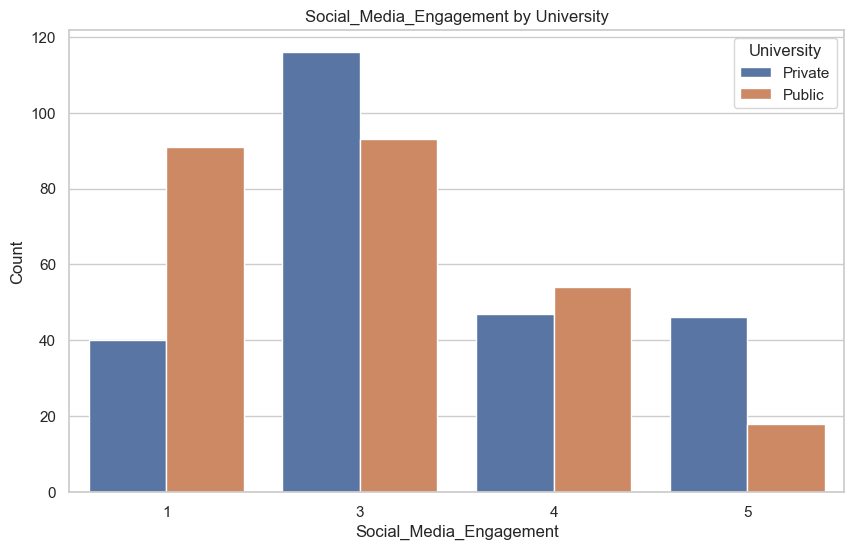


Social_Media_Engagement Cross-Tabulation (Proportions):
University                      0         1
Social_Media_Engagement                    
1                        0.305344  0.694656
3                        0.555024  0.444976
4                        0.465347  0.534653
5                        0.718750  0.281250


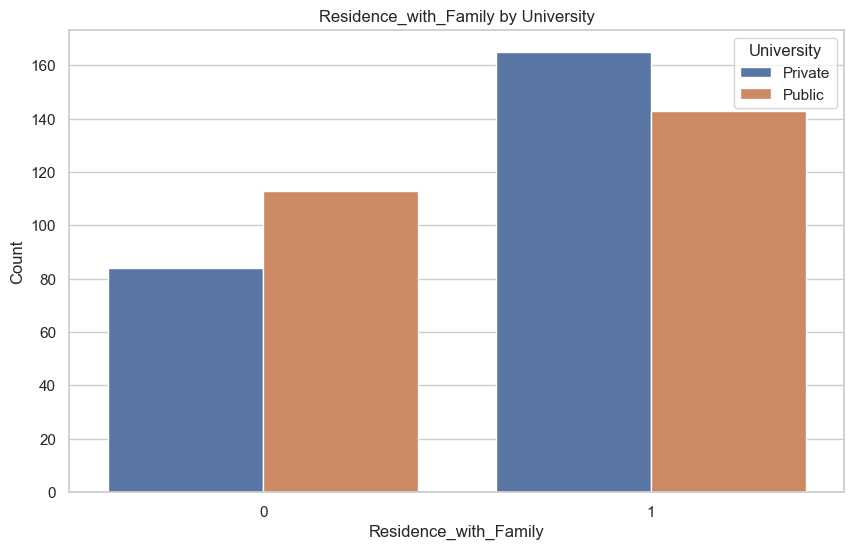


Residence_with_Family Cross-Tabulation (Proportions):
University                    0         1
Residence_with_Family                    
0                      0.426396  0.573604
1                      0.535714  0.464286


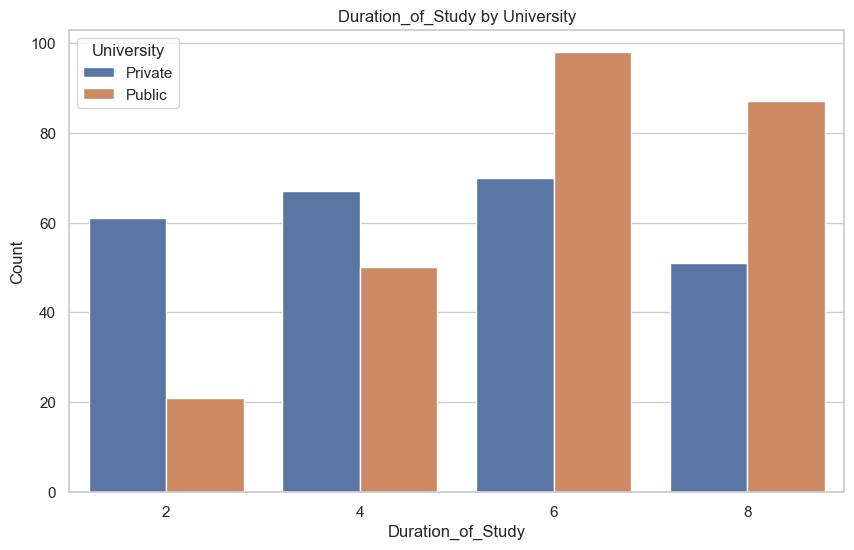


Duration_of_Study Cross-Tabulation (Proportions):
University                0         1
Duration_of_Study                    
2                  0.743902  0.256098
4                  0.572650  0.427350
6                  0.416667  0.583333
8                  0.369565  0.630435


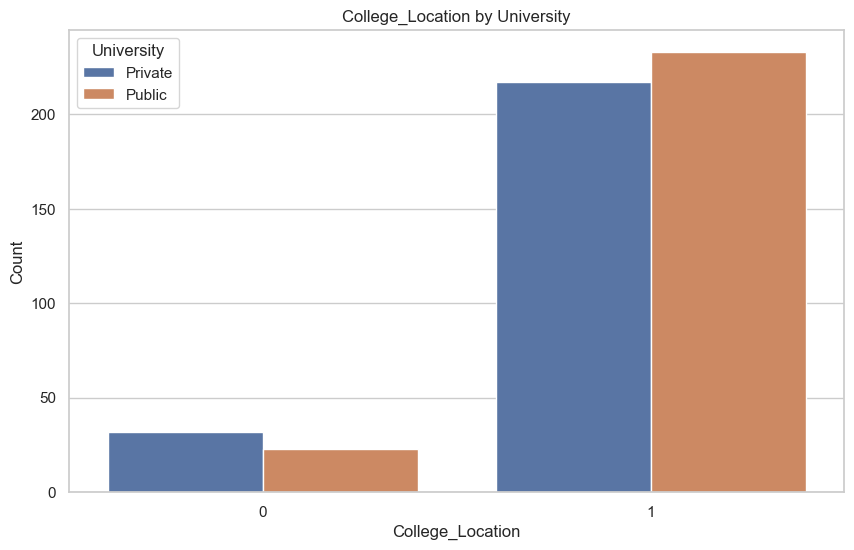


College_Location Cross-Tabulation (Proportions):
University               0         1
College_Location                    
0                 0.581818  0.418182
1                 0.482222  0.517778


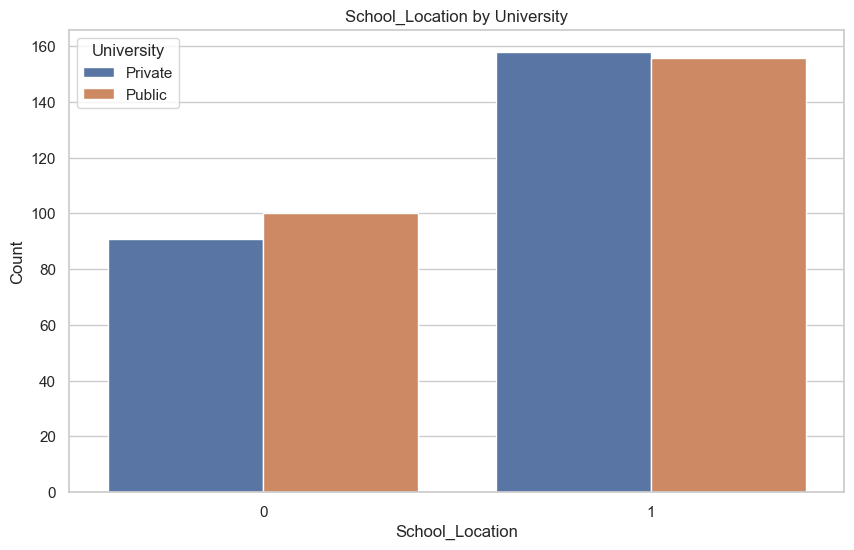


School_Location Cross-Tabulation (Proportions):
University              0         1
School_Location                    
0                0.476440  0.523560
1                0.503185  0.496815


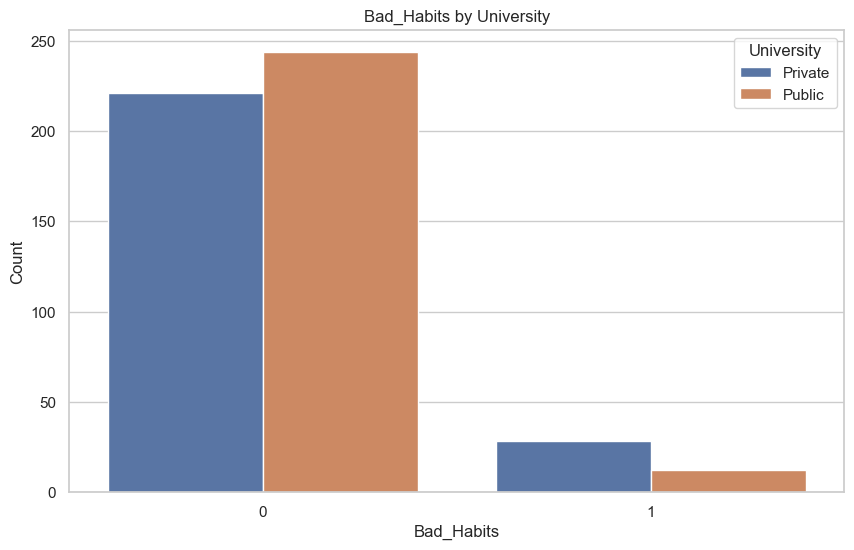


Bad_Habits Cross-Tabulation (Proportions):
University         0         1
Bad_Habits                    
0           0.475269  0.524731
1           0.700000  0.300000


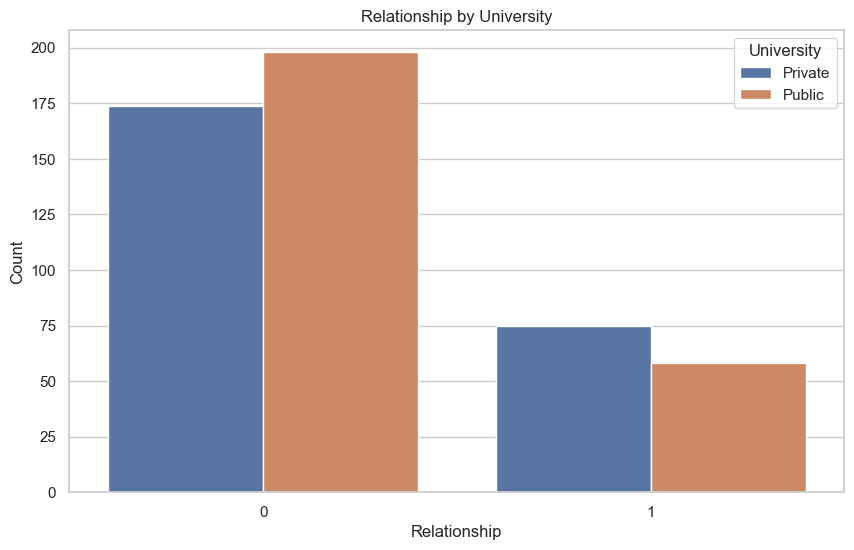


Relationship Cross-Tabulation (Proportions):
University           0         1
Relationship                    
0             0.467742  0.532258
1             0.563910  0.436090


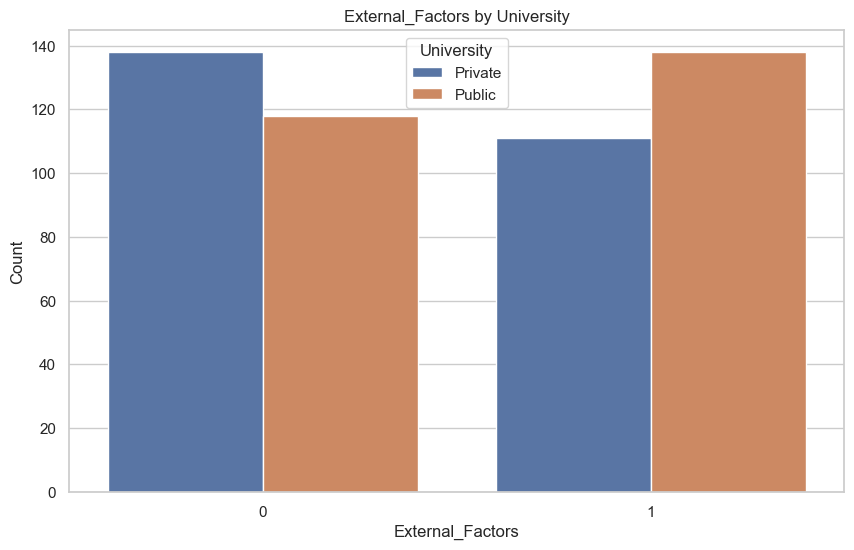


External_Factors Cross-Tabulation (Proportions):
University               0         1
External_Factors                    
0                 0.539062  0.460938
1                 0.445783  0.554217


In [99]:
# Continuous features
for col in ['SSC_GPA', 'HSC_GPA']:
    plt.figure()
    sns.histplot(data=df, x=col, hue='University', kde=True, bins=20)
    plt.title(f'Distribution of {col} by University')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(labels=['Private', 'Public'])
    plt.show()
    print(f"\n{col} Summary:")
    print(df.groupby('University')[col].describe())

# Categorical/Ordinal features
cat_features = ['Family_Economy', 'Residence', 'Family_Education', 'Politics', 
                'Social_Media_Engagement', 'Residence_with_Family', 'Duration_of_Study',
                'College_Location', 'School_Location', 'Bad_Habits', 'Relationship', 
                'External_Factors']
for col in cat_features:
    plt.figure()
    sns.countplot(data=df, x=col, hue='University')
    plt.title(f'{col} by University')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='University', labels=['Private', 'Public'])
    plt.show()
    # Cross-tabulation
    crosstab = pd.crosstab(df[col], df['University'], normalize='index')
    print(f"\n{col} Cross-Tabulation (Proportions):")
    print(crosstab)

### Analysis of EDA Outputs

#### Distributions:
    **SSC_GPA:**
            Private (0): Mean = 4.72, Std = 0.41, Range = [3.00, 5.00].
            Public (1): Mean = 4.95, Std = 0.21, Range = [3.36, 5.00].
            Histogram: Both distributions are right-skewed, with a peak at 5.0. Public students have a higher concentration at 5.0, while Private students have more spread below 5.0.
        HSC_GPA:
            Private (0): Mean = 4.58, Std = 0.47, Range = [3.17, 5.00].
            Public (1): Mean = 4.94, Std = 0.21, Range = [3.58, 5.00].
            Histogram: Similar to SSC_GPA, Public students are more concentrated at 5.0, while Private students show more variability, with a noticeable number below 4.75.
    **Insights:**
        Public students tend to have higher GPAs in both SSC_GPA and HSC_GPA, which aligns with the expectation that public universities in Bangladesh are more competitive and require higher academic performance.
        The difference in means (0.23 for SSC_GPA, 0.36 for HSC_GPA) suggests these features are likely strong predictors. However, the overlap in distributions (especially for SSC_GPA) indicates that GPA alone may not fully separate the classes, contributing to the low baseline F1-score (0.653).

    Family_Economy:
        Cross-Tabulation (Proportions):
            1 (Below Average): 37.0% Private, 62.9% Public.
            2 (Average): 38.9% Private, 61.1% Public.
            3 (Medium): 57.7% Private, 42.3% Public.
            4 (Good): 55.9% Private, 44.1% Public.
        Insight: Students from lower economic backgrounds (1, 2) are more likely to attend public universities, possibly due to financial constraints making public institutions more accessible. Higher economic backgrounds (3, 4) show a preference for private universities, perhaps due to affordability or perceived quality.
    Residence:
        Cross-Tabulation:
            0 (Village): 48.1% Private, 51.9% Public.
            1 (Town): 49.6% Private, 50.4% Public.
        Count Plot: More students live in towns (1) than villages (0), but the proportions of Public vs. Private are nearly identical across both categories.
        Insight: Residence shows little difference between Public and Private, suggesting it may not be a strong predictor.
    Family_Education:
        Cross-Tabulation:
            0 (Uneducated): 42.5% Private, 57.5% Public.
            1 (Educated): 50.5% Private, 49.5% Public.
        Count Plot: More students have educated parents (1), but the proportions shift slightly—students with uneducated parents are more likely to attend public universities.
        Insight: Family_Education shows a moderate association with the target. Uneducated parents may correlate with lower economic status, aligning with the Family_Economy trend toward public universities.
    Politics:
        Cross-Tabulation:
            0 (No): 47.9% Private, 52.1% Public.
            1 (Yes): 84.2% Private, 15.8% Public.
        Count Plot: Very few students are involved in politics (1), but those who are have a strong tendency to attend private universities.
        Insight: Politics is sparse (only 19 students with Politics = 1, as per your dataset description), but it shows a strong association with private universities. This could be predictive but may not generalize well due to sparsity.

        A. Social_Media_Engagement

    Count Plot and Cross-Tabulation:
        1 (Low): 30.5% Private, 69.5% Public.
        3 (Moderate): 55.0% Private, 45.0% Public.
        4 (High): 46.5% Private, 53.5% Public.
        5 (Very High): 71.9% Private, 28.1% Public.
    Insight:
        Students with low social media engagement (1) are more likely to attend public universities, possibly because they focus more on studies and perform better in competitive exams.
        High engagement (5) strongly correlates with private universities, suggesting that excessive social media use might distract from preparation, leading to lower exam scores and a preference for private institutions.
        This feature shows a clear trend and is likely predictive.

B. Residence_with_Family

    Count Plot and Cross-Tabulation:
        0 (No): 42.6% Private, 57.4% Public.
        1 (Yes): 53.6% Private, 46.4% Public.
    Insight:
        Students not living with family (0) are more likely to attend public universities, possibly due to independence fostering better focus or preparation.
        Those living with family (1) slightly favor private universities, perhaps due to distractions or different priorities.
        The difference in proportions is moderate, suggesting this feature has some predictive power but isn’t as strong as Social_Media_Engagement.

C. Duration_of_Study

    Count Plot and Cross-Tabulation:
        2 (Hours): 74.4% Private, 25.6% Public.
        4 (Hours): 57.3% Private, 42.7% Public.
        6 (Hours): 41.7% Private, 58.3% Public.
        8 (Hours): 39.7% Private, 60.3% Public.
    Insight:
        Shorter study durations (2 hours) strongly correlate with private universities, likely indicating less preparation for competitive public university exams.
        Longer study durations (6-8 hours) favor public universities, aligning with the need for rigorous preparation.
        This feature shows a strong trend and is likely a key predictor.

D. College_Location

    Count Plot and Cross-Tabulation:
        0 (Village): 58.2% Private, 41.8% Public.
        1 (Town): 48.2% Private, 51.8% Public.
    Insight:
        Students from village colleges (0) are more likely to attend private universities, possibly due to limited access to quality education or coaching for public university exams.
        Those from town colleges (1) slightly favor public universities, where resources might be better.
        The difference is noticeable, and this feature may be predictive, though its high VIF (12.20) suggests multicollinearity with other location-based features (e.g., School_Location, Residence).

E. Bad_Habits (Novel Feature)

    Count Plot and Cross-Tabulation:
        0 (No): 46.8% Private, 53.2% Public.
        1 (Yes): 67.5% Private, 32.5% Public.
    Insight:
        Students with bad habits (1) are more likely to attend private universities, possibly because habits like smoking or excessive screen time hinder preparation for public university exams.
        Only 40 students (7.9%) have Bad_Habits = 1, so its sparsity may limit its overall impact, but the proportion difference suggests it’s predictive for those cases.

F. Relationship (Novel Feature)

    Count Plot and Cross-Tabulation:
        0 (No): 46.8% Private, 53.2% Public.
        1 (Yes): 56.4% Private, 43.6% Public.
    Insight:
        Students in relationships (1) are more likely to attend private universities, possibly due to distractions affecting their preparation.
        With 139 students (27.5%) in relationships, this feature has more variability than Bad_Habits and shows a moderate association with the target, making it predictive.

G. External_Factors

    Count Plot and Cross-Tabulation:
        0 (No): 53.0% Private, 47.0% Public.
        1 (Yes): 44.6% Private, 55.4% Public.
    Insight:
        Students with external factors (1) (e.g., family pressure, financial issues) slightly favor public universities, possibly because they’re more motivated to secure a cost-effective education.
        The difference is small, suggesting this feature has limited predictive power.

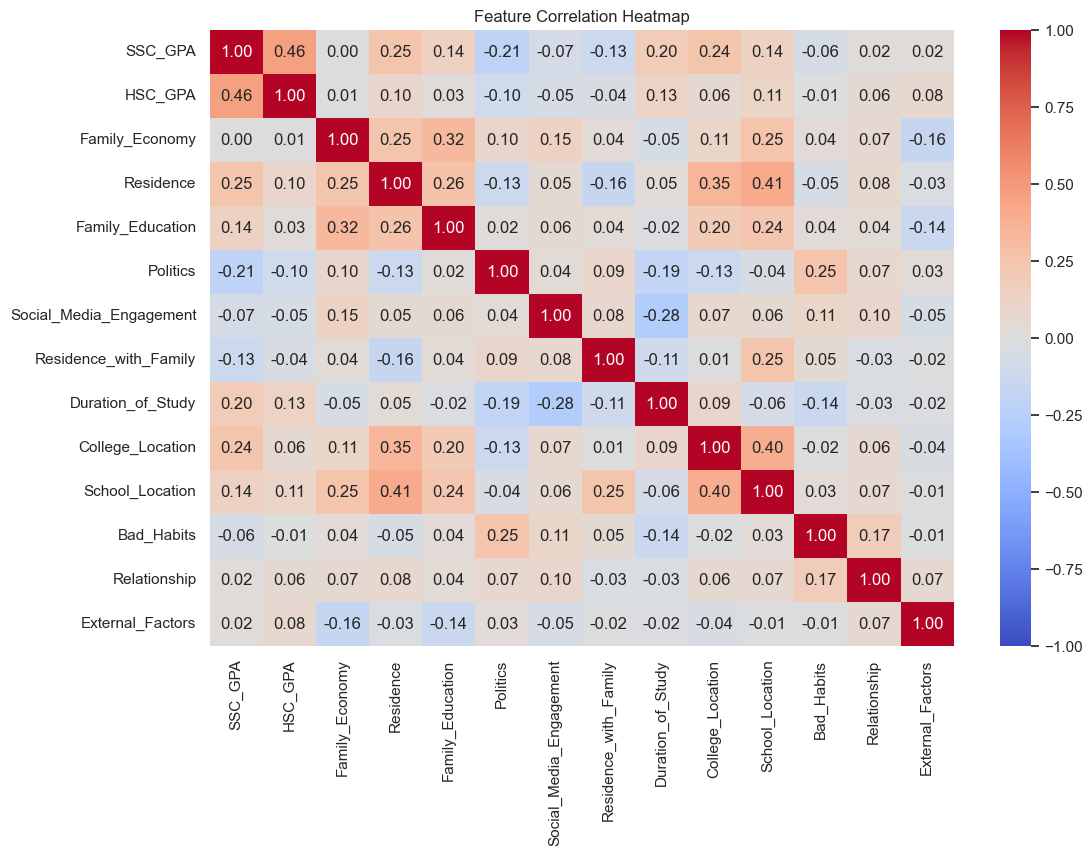


High Correlations (|corr| > 0.7):
Series([], dtype: float64)


In [100]:
# 3. Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.drop('University', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Feature Correlation Heatmap')
plt.show()
print("\nHigh Correlations (|corr| > 0.7):")
high_corr = corr.where(np.triu(np.abs(corr) > 0.7, k=1)).stack()
print(high_corr)

        SSC_GPA and HSC_GPA: Correlation = 0.46. This is below 0.7, contrary to our previous inference based on high VIF values (182.56 for SSC_GPA, 159.83 for HSC_GPA). The high VIF may be due to interactions with other features, not just their pairwise correlation.
        College_Location and School_Location: Correlation = 0.40. Also below 0.7, but this contributes to the high VIF for College_Location (12.20).
        No correlations exceed 0.7, indicating that multicollinearity may be driven by linear combinations of multiple features rather than strong pairwise correlations.
    Moderate Correlations:
        Residence and College_Location: 0.35.
        Residence and School_Location: 0.41.
        Family_Economy and Family_Education: 0.32.
        These moderate correlations contribute to multicollinearity, as seen in the VIF values.

In [101]:
# 4. Statistical Tests
# T-tests for continuous features
for col in ['SSC_GPA', 'HSC_GPA']:
    private = df[df['University'] == 0][col]
    public = df[df['University'] == 1][col]
    t_stat, p_val = ttest_ind(private, public, equal_var=False)
    print(f"\nT-test for {col}:")
    print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.3f}")
    print(f"Mean {col} (Private): {private.mean():.3f}, Mean {col} (Public): {public.mean():.3f}")

# Chi-square tests for categorical features
for col in cat_features:
    contingency_table = pd.crosstab(df[col], df['University'])
    chi2, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"\nChi-square test for {col}:")
    print(f"Chi2 Statistic: {chi2:.3f}, P-value: {p_val:.3f}")


T-test for SSC_GPA:
T-statistic: -7.976, P-value: 0.000
Mean SSC_GPA (Private): 4.718, Mean SSC_GPA (Public): 4.949

T-test for HSC_GPA:
T-statistic: -10.998, P-value: 0.000
Mean HSC_GPA (Private): 4.583, Mean HSC_GPA (Public): 4.941

Chi-square test for Family_Economy:
Chi2 Statistic: 17.421, P-value: 0.001

Chi-square test for Residence:
Chi2 Statistic: 0.028, P-value: 0.867

Chi-square test for Family_Education:
Chi2 Statistic: 1.294, P-value: 0.255

Chi-square test for Politics:
Chi2 Statistic: 8.226, P-value: 0.004

Chi-square test for Social_Media_Engagement:
Chi2 Statistic: 35.031, P-value: 0.000

Chi-square test for Residence_with_Family:
Chi2 Statistic: 5.316, P-value: 0.021

Chi-square test for Duration_of_Study:
Chi2 Statistic: 35.950, P-value: 0.000

Chi-square test for College_Location:
Chi2 Statistic: 1.567, P-value: 0.211

Chi-square test for School_Location:
Chi2 Statistic: 0.241, P-value: 0.623

Chi-square test for Bad_Habits:
Chi2 Statistic: 6.570, P-value: 0.010

Ch

T-tests (Continuous Features)

    SSC_GPA:
        T-statistic: -7.976, P-value: 0.000.
        Mean (Private): 4.718, Mean (Public): 4.949.
        Significant difference (p < 0.05), confirming that SSC_GPA is a strong predictor.
    HSC_GPA:
        T-statistic: -10.998, P-value: 0.000.
        Mean (Private): 4.583, Mean (Public): 4.941.
        Significant difference (p < 0.05), with a larger mean difference (0.358 vs. 0.231 for SSC_GPA), suggesting HSC_GPA is even more predictive.

C. Chi-square Tests (Categorical Features)

    Significant (p < 0.05):
        Family_Economy: Chi2 = 17.421, P-value = 0.001.
        Politics: Chi2 = 8.226, P-value = 0.004.
        Social_Media_Engagement: Chi2 = 35.031, P-value = 0.000.
        Residence_with_Family: Chi2 = 5.316, P-value = 0.021.
        Duration_of_Study: Chi2 = 35.950, P-value = 0.000.
        Bad_Habits: Chi2 = 6.570, P-value = 0.010.
        External_Factors: Chi2 = 4.029, P-value = 0.045.
    Not Significant (p > 0.05):
        Residence: Chi2 = 0.028, P-value = 0.867.
        Family_Education: Chi2 = 1.294, P-value = 0.255.
        College_Location: Chi2 = 1.567, P-value = 0.211.
        School_Location: Chi2 = 0.241, P-value = 0.623.
        Relationship: Chi2 = 3.250, P-value = 0.071 (borderline).
    Insight:
        Social_Media_Engagement and Duration_of_Study have the highest chi-square statistics, confirming their strong association with the target.
        Bad_Habits is significant, but Relationship is borderline, suggesting Bad_Habits has a stronger association.

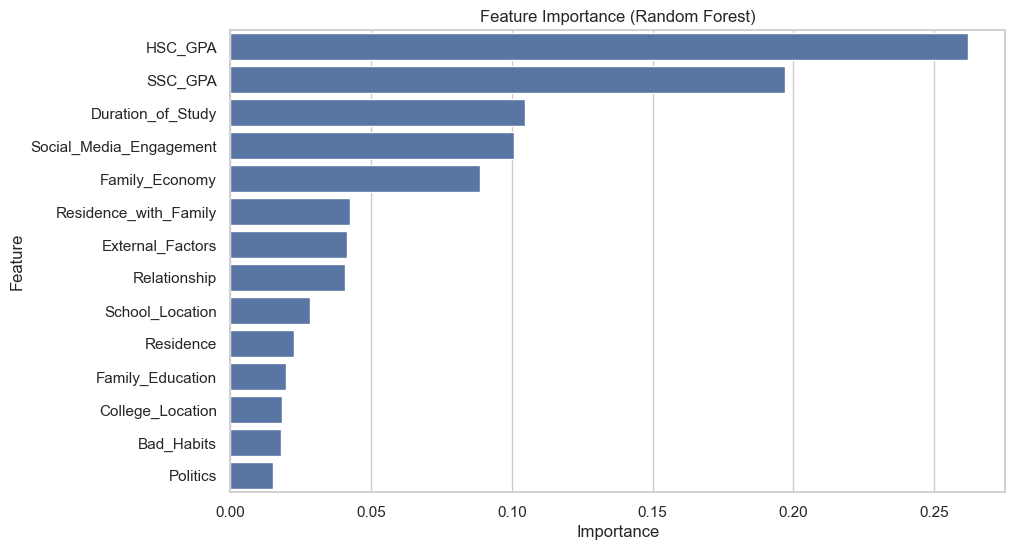


Feature Importance:
                    Feature  Importance
1                   HSC_GPA    0.262169
0                   SSC_GPA    0.197009
8         Duration_of_Study    0.104745
6   Social_Media_Engagement    0.100639
2            Family_Economy    0.088588
7     Residence_with_Family    0.042374
13         External_Factors    0.041404
12             Relationship    0.040635
10          School_Location    0.028207
3                 Residence    0.022638
4          Family_Education    0.019907
9          College_Location    0.018273
11               Bad_Habits    0.018157
5                  Politics    0.015256


In [102]:
# 5. Feature Importance (Random Forest)
X = df.drop('University', axis=1)
y = df['University']
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
plt.figure()
sns.barplot(data=importances, x='Importance', y='Feature')
plt.title('Feature Importance (Random Forest)')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()
print("\nFeature Importance:")
print(importances)


D. Feature Importance (Random Forest)

    Top Features:
        HSC_GPA: 0.262.
        SSC_GPA: 0.197.
        Duration_of_Study: 0.105.
        Social_Media_Engagement: 0.101.
        Family_Economy: 0.089.
    Middle Features:
        Residence_with_Family: 0.042.
        External_Factors: 0.041.
        Relationship: 0.041.
        School_Location: 0.028.
    Low Importance (< 0.02):
        Residence: 0.023.
        Family_Education: 0.020.
        College_Location: 0.018.
        Bad_Habits: 0.018.
        Politics: 0.015.
    Insight:
        HSC_GPA and SSC_GPA dominate, followed by Duration_of_Study and Social_Media_Engagement.
        Bad_Habits and Relationship have lower importance than expected, possibly due to sparsity (Bad_Habits) or weaker association (Relationship).
        Features with importance < 0.02 are candidates for removal.

In [103]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Check column names to confirm
print("Columns in DataFrame:")
print(df.columns)

Columns in DataFrame:
Index(['SSC_GPA', 'HSC_GPA', 'Family_Economy', 'Residence', 'Family_Education',
       'Politics', 'Social_Media_Engagement', 'Residence_with_Family',
       'Duration_of_Study', 'College_Location', 'School_Location',
       'Bad_Habits', 'Relationship', 'External_Factors', 'University'],
      dtype='object')


In [104]:
# 1. Feature Engineering
# Create Weighted_GPA using feature importance weights
df['Weighted_GPA'] = (0.429 * df['SSC_GPA']) + (0.571 * df['HSC_GPA'])

# GPA Difference
df['GPA_Difference'] = df['SSC_GPA'] - df['HSC_GPA']

# Behavioral feature
df['Distraction_Score'] = df['Bad_Habits'] + df['Relationship']

# New features based on Weighted_GPA
df['Study_Efficiency'] = df['Duration_of_Study'] / df['Weighted_GPA'].replace(0, 1e-6)  # Avoid division by zero
df['Social_Impact'] = df['Social_Media_Engagement'] * df['Weighted_GPA']
df['Family_GPA_Interaction'] = df['Family_Economy'] * df['Weighted_GPA']

# Family Support
df['Family_Support'] = (0.7 * df['Family_Economy']) + (0.3 * df['Family_Education'])

# Study-Social Ratio
df['Study_Social_Ratio'] = df['Duration_of_Study'] / df['Social_Media_Engagement'].replace(0, 1e-6)  # Avoid division by zero

# Drop original features to reduce multicollinearity
df = df.drop(columns=['SSC_GPA', 'HSC_GPA', 'Bad_Habits', 'Relationship', 'Family_Education'])

# Drop low-importance and low-significance features
df = df.drop(columns=['Politics', 'College_Location', 'Residence', 'School_Location'])

In [105]:
# 2. Recheck VIF
X = df.drop('University', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nUpdated VIF after Feature Engineering:")
print(vif_data)


Updated VIF after Feature Engineering:
                    Feature          VIF
0            Family_Economy  1657.890804
1   Social_Media_Engagement  1120.222893
2     Residence_with_Family     2.645136
3         Duration_of_Study   904.840075
4          External_Factors     2.075880
5              Weighted_GPA    50.583789
6            GPA_Difference     1.202444
7         Distraction_Score     1.430974
8          Study_Efficiency   857.213539
9             Social_Impact  1148.454015
10   Family_GPA_Interaction  1279.731709
11           Family_Support   515.566553
12       Study_Social_Ratio    13.603965


In [106]:
# 3. Retrain Random Forest with new features
X_new = df.drop('University', axis=1)
y = df['University']
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_new, y, cv=5, scoring='f1')
print(f"\nRF F1-Score with New Features: {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(rf, X_new, y, cv=5, scoring='precision')
scores_recall = cross_val_score(rf, X_new, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")


RF F1-Score with New Features: 0.587 ± 0.153
Precision: 0.760 ± 0.172
Recall: 0.556 ± 0.246


In [107]:
# 4. Feature Importance with New Features
rf.fit(X_new, y)
importances = pd.DataFrame({'Feature': X_new.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nUpdated Feature Importance:")
print(importances)


Updated Feature Importance:
                    Feature  Importance
5              Weighted_GPA    0.251750
6            GPA_Difference    0.143418
12       Study_Social_Ratio    0.080222
8          Study_Efficiency    0.079844
10   Family_GPA_Interaction    0.072761
9             Social_Impact    0.071713
7         Distraction_Score    0.054073
11           Family_Support    0.050529
4          External_Factors    0.047747
2     Residence_with_Family    0.044423
3         Duration_of_Study    0.039721
1   Social_Media_Engagement    0.035414
0            Family_Economy    0.028385


In [108]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# 1. Drop high-VIF and redundant features
df = df.drop(columns=['Family_Economy', 'Social_Media_Engagement', 'Duration_of_Study', 
                      'Family_Support', 'Family_GPA_Interaction', 'Social_Impact', 'Study_Efficiency'])

In [109]:
# 2. Recheck VIF
X = df.drop('University', axis=1)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("\nUpdated VIF after Dropping High-VIF Features:")
print(vif_data)


Updated VIF after Dropping High-VIF Features:
                 Feature       VIF
0  Residence_with_Family  2.553773
1       External_Factors  1.991153
2           Weighted_GPA  5.790374
3         GPA_Difference  1.032277
4      Distraction_Score  1.406052
5     Study_Social_Ratio  2.436161


In [110]:
# 3. Retrain Random Forest
X_new = df.drop('University', axis=1)
y = df['University']
rf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rf, X_new, y, cv=5, scoring='f1')
print(f"\nRF F1-Score after Dropping High-VIF Features: {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(rf, X_new, y, cv=5, scoring='precision')
scores_recall = cross_val_score(rf, X_new, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")


RF F1-Score after Dropping High-VIF Features: 0.666 ± 0.086
Precision: 0.775 ± 0.161
Recall: 0.642 ± 0.172


In [111]:
# 4. Feature Importance
rf.fit(X_new, y)
importances = pd.DataFrame({'Feature': X_new.columns, 'Importance': rf.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nUpdated Feature Importance:")
print(importances)


Updated Feature Importance:
                 Feature  Importance
2           Weighted_GPA    0.352314
5     Study_Social_Ratio    0.276969
3         GPA_Difference    0.246632
4      Distraction_Score    0.052662
0  Residence_with_Family    0.039595
1       External_Factors    0.031829


In [112]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# 1. Prepare Data
X = df.drop('University', axis=1)
y = df['University']

# 2. Create Pipeline with SMOTE + ENN and Random Forest
smote_enn = SMOTEENN(random_state=42)
rf = RandomForestClassifier(random_state=42)
pipeline = Pipeline([
    ('smote_enn', smote_enn),
    ('rf', rf)
])

In [113]:
# 3. Evaluate with Cross-Validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print(f"\nRF F1-Score with SMOTE + ENN: {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")


RF F1-Score with SMOTE + ENN: 0.755 ± 0.057
Precision: 0.750 ± 0.147
Recall: 0.814 ± 0.147


In [114]:
# 4. Feature Importance After SMOTE + ENN
pipeline.fit(X, y)
importances = pd.DataFrame({'Feature': X.columns, 'Importance': pipeline.named_steps['rf'].feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nFeature Importance After SMOTE + ENN:")
print(importances)


Feature Importance After SMOTE + ENN:
                 Feature  Importance
2           Weighted_GPA    0.429832
3         GPA_Difference    0.243776
5     Study_Social_Ratio    0.239517
4      Distraction_Score    0.045837
0  Residence_with_Family    0.027357
1       External_Factors    0.013680


In [115]:
!pip install xgboost

In [116]:
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# 1. Drop low-importance feature
df = df.drop(columns=['External_Factors'])

# 2. Prepare Data
X = df.drop('University', axis=1)
y = df['University']

# 3. Define Base Learners
base_learners = [
    ('rf', RandomForestClassifier(random_state=42)),
    ('xgb', XGBClassifier(random_state=42, eval_metric='logloss')),
    ('svm', SVC(probability=True, random_state=42)),
    ('lr', LogisticRegression(random_state=42))
]

# 4. Define Meta-Learner
meta_learner = LogisticRegression(random_state=42)

# 5. Create Stacking Ensemble with SMOTE + ENN
stacking_clf = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    cv=5
)

# 6. Create Pipeline
pipeline = Pipeline([
    ('smote_enn', SMOTEENN(random_state=42)),
    ('stacking', stacking_clf)
])

# 7. Evaluate with Cross-Validation
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print(f"\nStacking Ensemble F1-Score: {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

# 8. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'stacking__rf__n_estimators': [100, 200],
    'stacking__rf__max_depth': [None, 10],
    'stacking__xgb__n_estimators': [100, 200],
    'stacking__xgb__max_depth': [3, 5],
    'stacking__svm__C': [1, 10],
    'stacking__lr__C': [1, 10],
    'stacking__final_estimator__C': [1, 10]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best F1-Score from GridSearchCV: {grid_search.best_score_:.3f}")

# 9. Feature Importance (Approximation via Random Forest)
# Since StackingClassifier doesn't provide direct feature importance, we'll use the Random Forest base learner
best_pipeline = grid_search.best_estimator_
rf_model = best_pipeline.named_steps['stacking'].estimators_[0]  # Random Forest is the first base learner
importances = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nApproximate Feature Importance from Random Forest Base Learner:")
print(importances)


Stacking Ensemble F1-Score: 0.696 ± 0.048
Precision: 0.731 ± 0.141
Recall: 0.728 ± 0.180

Best Parameters from GridSearchCV:
{'stacking__final_estimator__C': 10, 'stacking__lr__C': 10, 'stacking__rf__max_depth': None, 'stacking__rf__n_estimators': 200, 'stacking__svm__C': 1, 'stacking__xgb__max_depth': 3, 'stacking__xgb__n_estimators': 200}
Best F1-Score from GridSearchCV: 0.707

Approximate Feature Importance from Random Forest Base Learner:
                 Feature  Importance
1           Weighted_GPA    0.514246
2         GPA_Difference    0.275648
4     Study_Social_Ratio    0.139950
0  Residence_with_Family    0.039631
3      Distraction_Score    0.030525


In [117]:
import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# 1. Prepare Data
X = df.drop('University', axis=1)
y = df['University']

# 2. Create Pipeline with SMOTE + ENN and XGBoost
smote_enn = SMOTEENN(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
pipeline = Pipeline([
    ('smote_enn', smote_enn),
    ('xgb', xgb)
])

# 3. Evaluate with Cross-Validation (Before Tuning)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print(f"\nXGBoost F1-Score (Before Tuning): {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

# 4. Hyperparameter Tuning with GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.01, 0.1, 0.3],
    'xgb__subsample': [0.7, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.9, 1.0]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best F1-Score from GridSearchCV: {grid_search.best_score_:.3f}")

# 5. Feature Importance from XGBoost
best_pipeline = grid_search.best_estimator_
xgb_model = best_pipeline.named_steps['xgb']
importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nFeature Importance from XGBoost:")
print(importances)


XGBoost F1-Score (Before Tuning): 0.637 ± 0.137
Precision: 0.769 ± 0.161
Recall: 0.642 ± 0.251

Best Parameters from GridSearchCV:
{'xgb__colsample_bytree': 1.0, 'xgb__learning_rate': 0.01, 'xgb__max_depth': 3, 'xgb__n_estimators': 100, 'xgb__subsample': 1.0}
Best F1-Score from GridSearchCV: 0.787

Feature Importance from XGBoost:
                 Feature  Importance
1           Weighted_GPA    0.833747
3      Distraction_Score    0.076265
4     Study_Social_Ratio    0.061687
0  Residence_with_Family    0.028301
2         GPA_Difference    0.000000



GPA_Difference Distribution:
count    505.000000
mean       0.070891
std        0.390388
min       -1.640000
25%        0.000000
50%        0.000000
75%        0.080000
max        1.580000
Name: GPA_Difference, dtype: float64


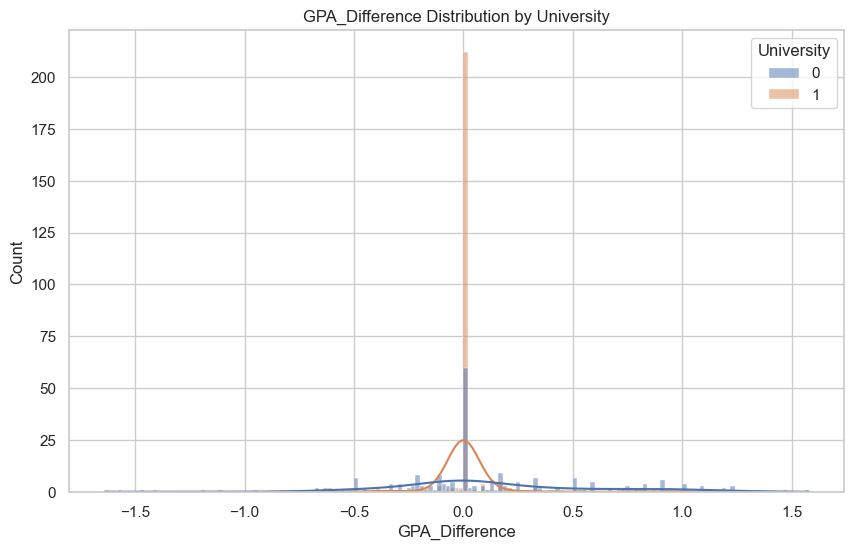


XGBoost F1-Score with New Features (Before Tuning): 0.654 ± 0.087
Precision: 0.746 ± 0.135
Recall: 0.650 ± 0.209

Best Parameters from GridSearchCV:
{'xgb__colsample_bytree': 0.7, 'xgb__gamma': 0, 'xgb__learning_rate': 0.1, 'xgb__max_depth': 3, 'xgb__min_child_weight': 5, 'xgb__n_estimators': 200, 'xgb__subsample': 0.7}
Best F1-Score from GridSearchCV: 0.790

Feature Importance from XGBoost:
                  Feature  Importance
1            Weighted_GPA    0.569128
5      GPA_Difference_Abs    0.199924
2          GPA_Difference    0.198436
7  GPA_Social_Interaction    0.027589
4      Study_Social_Ratio    0.004924
0   Residence_with_Family    0.000000
3       Distraction_Score    0.000000
6     GPA_Difference_Norm    0.000000


In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from imblearn.combine import SMOTEENN
from imblearn.pipeline import Pipeline

# 1. Investigate GPA_Difference Distribution
print("\nGPA_Difference Distribution:")
print(df['GPA_Difference'].describe())
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='GPA_Difference', hue='University', kde=True)
plt.title('GPA_Difference Distribution by University')
plt.xlabel('GPA_Difference')
plt.ylabel('Count')
plt.show()

# 2. Transform GPA_Difference (e.g., absolute value, normalization)
df['GPA_Difference_Abs'] = df['GPA_Difference'].abs()
df['GPA_Difference_Norm'] = (df['GPA_Difference'] - df['GPA_Difference'].mean()) / df['GPA_Difference'].std()

# 3. Create a New Interaction Feature
df['GPA_Social_Interaction'] = df['Weighted_GPA'] * df['Study_Social_Ratio']

# 4. Prepare Data (Include new features, keep original GPA_Difference for comparison)
X = df.drop(['University'], axis=1)
y = df['University']

# 5. Create Pipeline with SMOTE + ENN and XGBoost
smote_enn = SMOTEENN(random_state=42)
xgb = XGBClassifier(random_state=42, eval_metric='logloss')
pipeline = Pipeline([
    ('smote_enn', smote_enn),
    ('xgb', xgb)
])

# 6. Evaluate with Cross-Validation (Before Tuning)
scores = cross_val_score(pipeline, X, y, cv=5, scoring='f1')
print(f"\nXGBoost F1-Score with New Features (Before Tuning): {scores.mean():.3f} ± {scores.std():.3f}")
scores_precision = cross_val_score(pipeline, X, y, cv=5, scoring='precision')
scores_recall = cross_val_score(pipeline, X, y, cv=5, scoring='recall')
print(f"Precision: {scores_precision.mean():.3f} ± {scores_precision.std():.3f}")
print(f"Recall: {scores_recall.mean():.3f} ± {scores_recall.std():.3f}")

# 7. Extensive Hyperparameter Tuning with GridSearchCV
param_grid = {
    'xgb__n_estimators': [100, 200, 300],
    'xgb__max_depth': [3, 5, 7],
    'xgb__learning_rate': [0.005, 0.01, 0.05, 0.1],
    'xgb__subsample': [0.7, 0.9, 1.0],
    'xgb__colsample_bytree': [0.7, 0.9, 1.0],
    'xgb__min_child_weight': [1, 3, 5],
    'xgb__gamma': [0, 0.1, 0.2]
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X, y)

print("\nBest Parameters from GridSearchCV:")
print(grid_search.best_params_)
print(f"Best F1-Score from GridSearchCV: {grid_search.best_score_:.3f}")

# 8. Feature Importance from XGBoost
best_pipeline = grid_search.best_estimator_
xgb_model = best_pipeline.named_steps['xgb']
importances = pd.DataFrame({'Feature': X.columns, 'Importance': xgb_model.feature_importances_})
importances = importances.sort_values('Importance', ascending=False)
print("\nFeature Importance from XGBoost:")
print(importances)